# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preoprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# TODO: Minimum price of the data
minimum_price = min(data['MDEV'])

# TODO: Maximum price of the data
maximum_price = max(data['MDEV'])

# TODO: Mean price of the data
mean_price = np.mean(data['MDEV'])

# TODO: Median price of the data
median_price = np.median(data['MDEV'])

# TODO: Standard deviation of prices of the data
std_price = np.std(data['MDEV'])

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)



Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: *1) I expect that the LSTAT - percentage of the homeowners with greater net worth than other homeowners in the neighborhood would have a direct negative relationship with MDEV - the value of homes. I hypothesize that an increase in LSTAT would be reflected with a decrease in MDEV. My rationale would be that a lower LSTAT indicates a wealthier neighborhood in terms of income, and the houses will be pricier. 2) I expect that the RM - number of rooms would be positively related to the MDEV, so more rooms per house, higher the price. However, the relationship may be weaker when controlled for the LSTAT. So when the LSTAT is controlled for or constant, an increase in the numbers of rooms would have an increase in the MDEV, but the relationship would either be weak or non-existent if we do not take into account LSTAT. My rationale for this would be that a lower LSTAT implies a wealthier neighborhood and without considering that, the number of rooms should not have an impact on the price (i.e., a house with many rooms in a poorer neighborhood may have an equal value or even less than a house with much less rooms but in a wealthier neighborhood. 3) PTRATIO may have a negative relationship on the MDEV in a way that a smaller ratio of student to teachers would result in an increase in the house prices. I am not completely sure about this because there are many private schools that may be located in poorer neighborhoods but they are not indicative of the neighborhood - the narrative above does not state whether we are talking about public or private schools. For public schools, I can see how this relationship could have been stronger, but taking into account private schools, I am not sure. Rationale for this would be that a smaller ratio indicates a better school - likely a pricier one - although not neccesarily always the case. Here too, I think that controlling for LSTAT is crucial. If we control for LSTAT the relationship between PTRATIO and MDEV would be stronger, so a smaller ratio is associated with higher house prices. If we do not control for LSTAT the relationship may be weaker, if existent at all. So in sum, I believe that LSTAT would have the stronger relationship with MDEV (albeit negative), followed by RM and finally PTRATIO.*

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [7]:
# TODO: Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [8]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:*A coefficient of determination of 0.923 is very strong because it is so close to 1. It implies a very good fit between the predicted and true values. Therefore I would consider this model to have successfully captured the variation of the target variable.*

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [9]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X,y = features, prices
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20, random_state=50) 

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: *The benefit of splitting the dataset into training and testing subset is that we can train the algorithm into the training set until we find the algorithm that best fits the data keeping an eye on complexity to avoid overfitting. Once we have an algorithm that seems to fit the training test, we can run it into the testing set - which is a new set of new data and see how well it fits into unknown data. If we did not have a training and testing samples, we can easily run into problems of high complexity that will result in overfitting, which means that the data cannot be generalized to other samples of population and can only explain the sample we have. This is not a good idea for any study if we cannot draw conclusions about the population at large.*

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

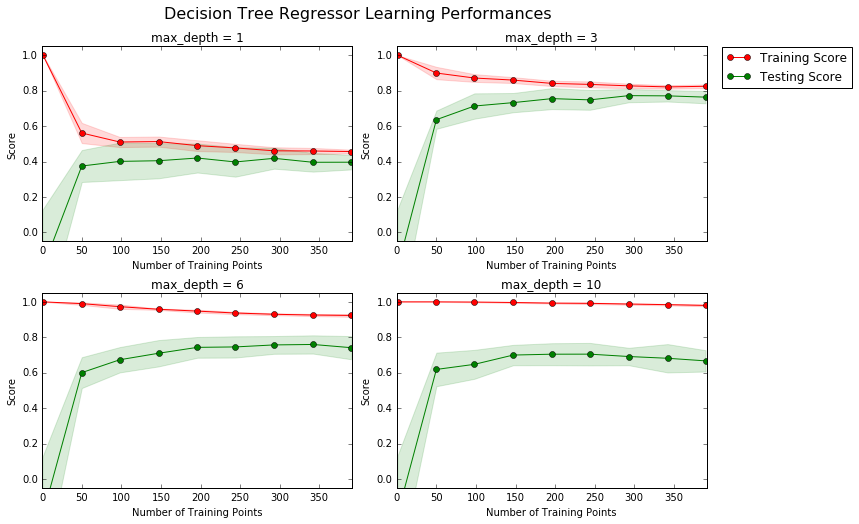

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: *I would choose the second graph with max_depth = 3. As the number of training points are added in the model, the model seems to get closer to be a better fit for the testing scores too. At 50 points, the training and testing scores are further from each other. By increasing the points to 200, we can visually see how the model fits the testing scores as well. The two curves are almost converging. A similar effect is on the testing curve. Having more points is always best for the model, but for a max_depth = 3 as in this case, having more data may not make a substantial difference.  In a higher max_depth, such as 6 or 10 - an indicator that the model is a little more complex, having more data should definitely help to train the training scores into a better fit. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

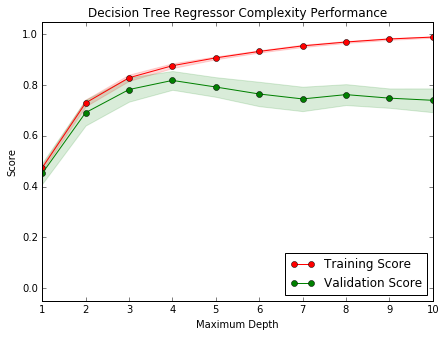

In [11]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: *At a maximum depth of 1 the model suffers from high bias because the model cannot capture the complexity of the model, so it is underfitting. When the model is trained at a max_depth of 10 we have high variance and the model is overfitting. Here the model is fitting too much and it is becoming to complex to fit the training data to the point that it cannot be generalized to testing model. When the points are too close to each other with smaller max_depth the model is underfitting and not very complex. We want the training and the testing scores to be close but we also want some complexity of the data - some variance is okay, like around max_depth = 4. As the models get further away from each other, the model is becoming too complex and is overfitting with high variance - the fact that the curves are getting further from each other is an indicator for this. *

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: *I would say somewhere between max_depth = 4 or 5. There is some variance, but the curves are still close to each other to indicate that the model is a good fit. The model is not too simple to be underfitting like it is max_depth =1.*

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: *A grid search is a technique that considers multiple combination of parameters to find the best fit for the model. It considers the learning model, the data, and the scoring criteria. It does so by considering different combinations of parameters and different possible values. The performance of the model is tested by using cross-validation. Once the classifiers are created, it creates a grid of classifiers to see which combination best fits the data. The final model is tuned for the best model and it can even give you the best model possible. *

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: *k-fold cross-validation is a technique that splits the dataset into k equal groups for training and testing sets. One of these groups is saved for testing (k-1) groups are for training sets. This way the data can be tested into different training groups to increase accuracy and ensure the model will best fit the testing set. This model provides the benefits of increasing the accuracy of the model compared to splitting into only train and test sets. Its training time may be a little longer because there are k-1 groups that the model will be tried on first, but the running time may be shorter and the accuracy of the model is higher. If we use the grid search without cross-validated set, we may find a model that fitst the training test but will not be as accurate when it runs on the testing set because of different distribution of the data. To avoid this, the k-fold cross validation technique is preferred. *

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [15]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV (regressor, params, scoring = scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [16]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: *The maximum depth for the optimal model is 4. The answer in question 6 is similar. From the visuals, I was considering something between 4 and 5, but I can see how 4 is better.*

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [17]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $339,570.00
Predicted selling price for Client 2's home: $212,223.53
Predicted selling price for Client 3's home: $938,053.85


**Answer: *For client 1 who is looking for 5 rooms, with household net worth of 34th percent and student teacher ratio 15 to 1, a house of 339,570.00 dollars is reasonable. For client 2 who is looking for 4 rooms, household worth at the bottom 45th percent and student teacher ratio of 22 to 1, a house that cost around 212,223.53 dollars and the third client who is looking for 8 rooms at the top 7th percent at a student teacher ratio of 12 to 1, a house that cost 938,053.85 dollars is reasonable. Given the values for each feature these prices seem about right.*

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [18]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $332,850.00
Trial 2: $411,417.39
Trial 3: $346,500.00
Trial 4: $324,450.00
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $306,000.00
Trial 10: $316,890.00

Range in prices: $107,334.78


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: *1) My first reaction was that the data from 1978 may not be as relevant today because of the changing housing market. However, I am recently reading "The signal and the noise: Why so many predictions fail, but some don't" by Silver Nate and when he discusses the housing bubble, he explains that the housing market does not really change as much as we may think (or at least it used to not change as much before we had the housing bubble). Nevertheless, even if the prices may change, I believe the features that determine a higher price versus a lower price that were considered in this dataset are still relevant today. 
2) The short answer is Yes and No. Yes, because a wealthier neighborhood versus a less wealthy neighborhood would still be very important in the determination of a price for a house. The same for the number of rooms, and teacher student ratio. However, there are other features to consider that are not present in this dataset. For example, proximity to industrial or other type of institutions that may cause questionable quality of air or similar concerns, proximity to shopping centers, the number of families with children, the average age of people living in the neighborhood, the number of bathrooms in the house, the quality of kitchen, fireplace, whether there is a pool or not, etc. I am not an expert in housing, but I think that the net worth is perhaps one of the best indicators. 
3) The range in prices is 107,334.78 which I think it is pretty good and an indicator that the model is robust. Now we may want an even sturdier model that only changes with a couple of thousand dollars, but considering other characteristics of the house, I think this is pretty robust. 
4) I am not sure that the data collected in an urban area would be applicable in a rural area for a variety of reasons. First, in rural areas most houses will have a lot of rooms because space available is not as big of an issue as it is in Boston or NYC, so the number of rooms may not be a good predictor. In a rural area, there will likely be a very limited number of schools - often 1 or 2 schools where everyone goes to - so the number of teacher students may not be a feature to predict the house prices. I think the net worth of the house will still be relevant, but my guess is that other features will be important in a rural area such as the type of land, is farming or not available, whether a river is nearby, the acres available, and so on. These are just assumption from someone who is not an expert in this topic.*